In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import random

In [17]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def spread_info(G, prob):
    print(f"For probability = {prob}")
    # Set the probability of passing the information to neighbors
    p = prob
    sum_steps = 0
    sum_people = 0
    for i in range(0, 10):

        # Select a random node and assume it has information I
        start_node = random.choice(list(G.nodes))
        G.nodes[start_node]['info'] = 'I'

        # Initialize a list to keep track of which nodes have received the information
        infected_nodes = [start_node]
        active_nodes = infected_nodes

        # Initialize a counter for the number of steps required to reach the maximum number of nodes
        steps = 0

        # Keep passing the information until no new nodes are infected
        while True:
            new_infected_nodes = []
            for node in active_nodes:
                # Pass the information to neighbors with probability p
                for neighbor in G.neighbors(node):
                    if neighbor not in infected_nodes and random.random() < p:
                        G.nodes[neighbor]['info'] = 'I'
                        new_infected_nodes.append(neighbor)

            if len(new_infected_nodes) == 0:
                # No new nodes infected, stop passing the information
                break

            infected_nodes.extend(new_infected_nodes)
            active_nodes = new_infected_nodes
            steps += 1

            # Draw the graph showing the current state of information propagation
            plt.figure(figsize=(8, 6))
            pos = nx.spring_layout(G, seed=42)
            nx.draw(G, pos, with_labels=False, node_size=10, node_color=[('yellow' if G.nodes[n].get('info') == 'I' else 'blue') for n in G.nodes()])
            plt.title(f"Iteration {i+1}, Step {steps}")
            plt.show()

        sum_steps += steps
        sum_people += len(infected_nodes)
        print(f"Test {i+1}: Information was passed to {len(infected_nodes)} nodes in {steps} steps.")

        # Reset 'info' attribute for the next iteration
        nx.set_node_attributes(G, {node: {'info': None} for node in G.nodes()}, 'info')

    avg_steps = sum_steps / 10
    avg_people = sum_people / 10
    print(f"Average number of nodes infected = {avg_people}")
    print(f"Average number of steps = {avg_steps}")

For probability = 0.5


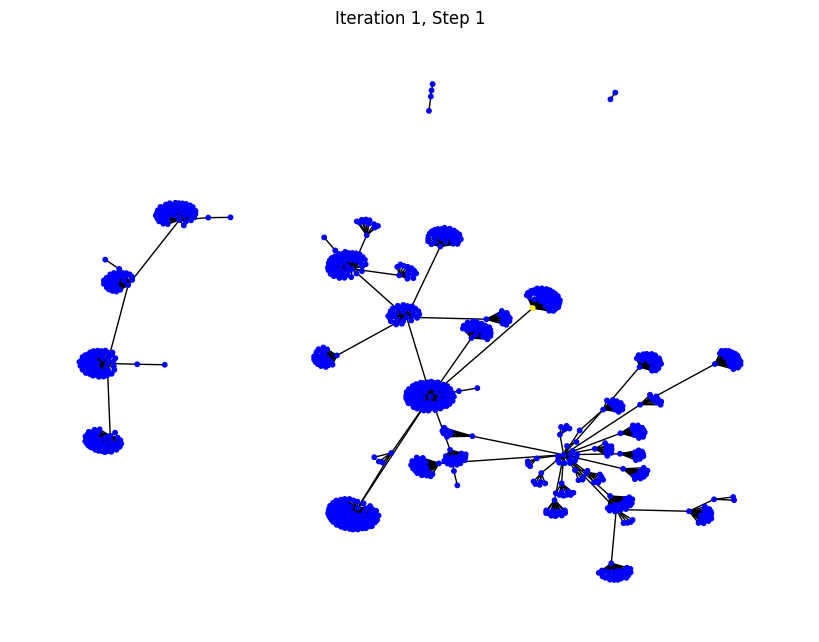

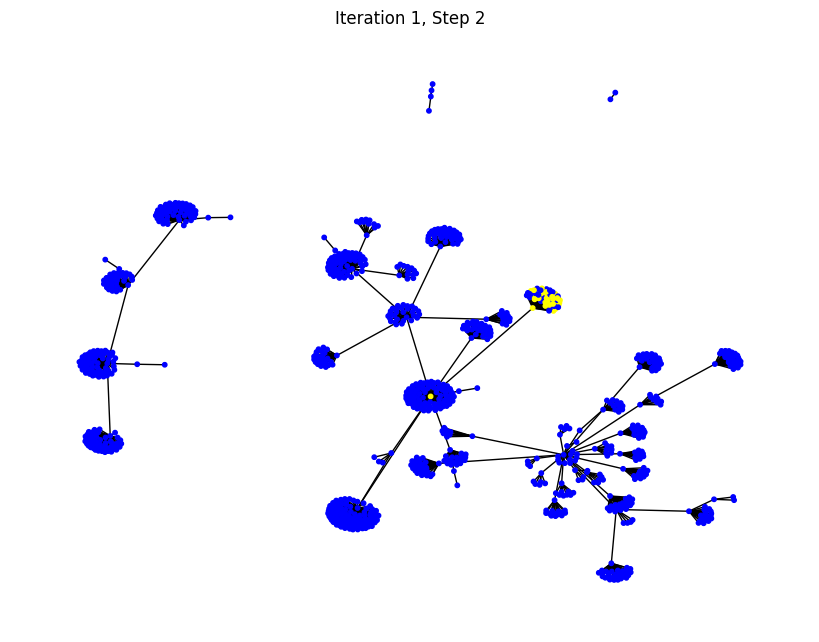

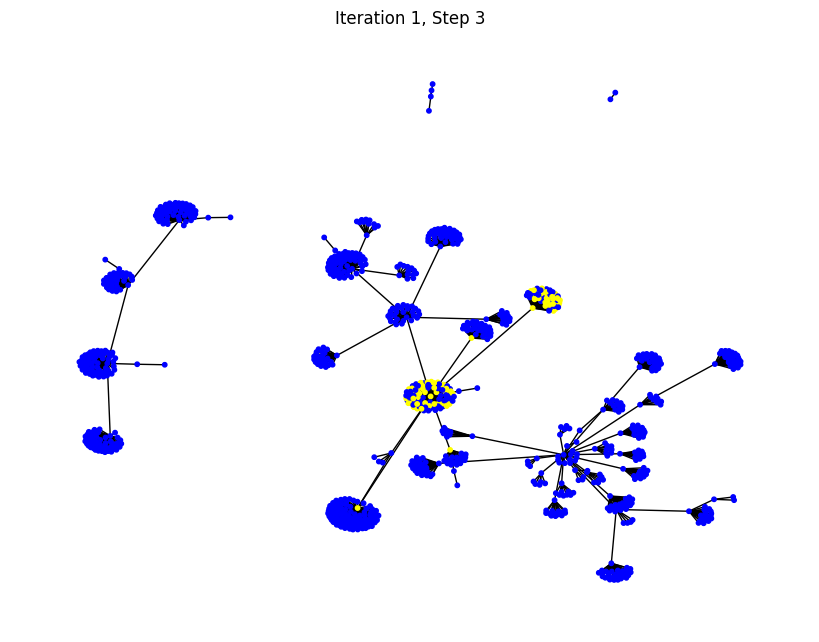

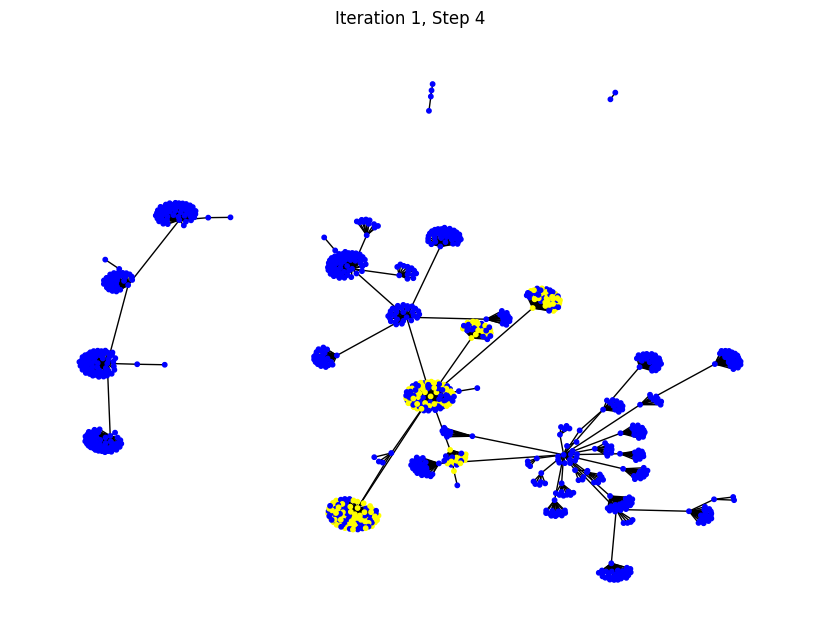

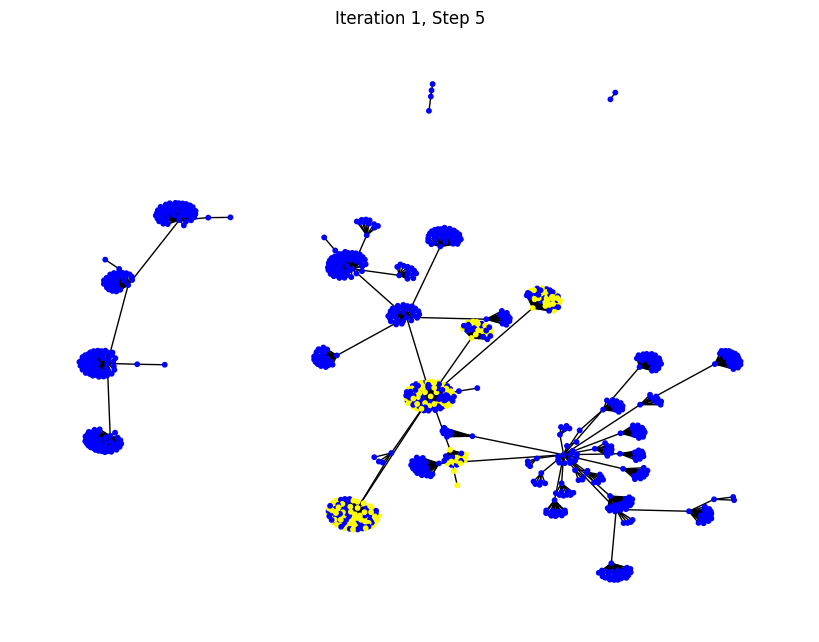

Test 1: Information was passed to 156 nodes in 5 steps.
Test 2: Information was passed to 1 nodes in 0 steps.


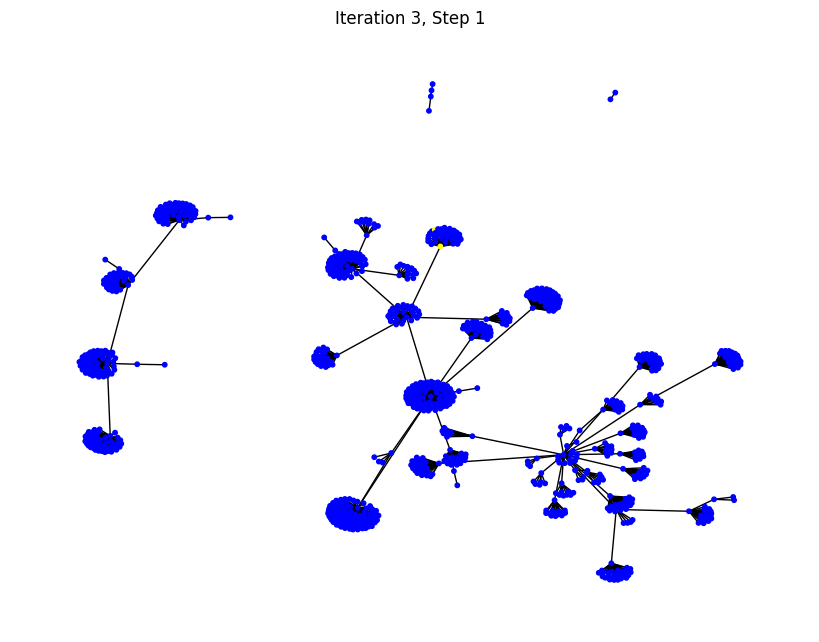

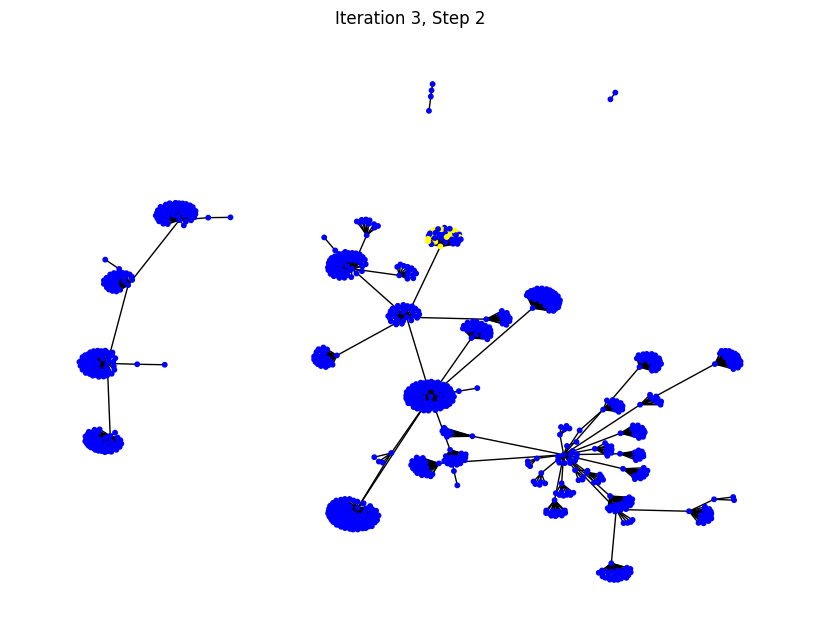

Test 3: Information was passed to 17 nodes in 2 steps.
Test 4: Information was passed to 1 nodes in 0 steps.
Test 5: Information was passed to 1 nodes in 0 steps.


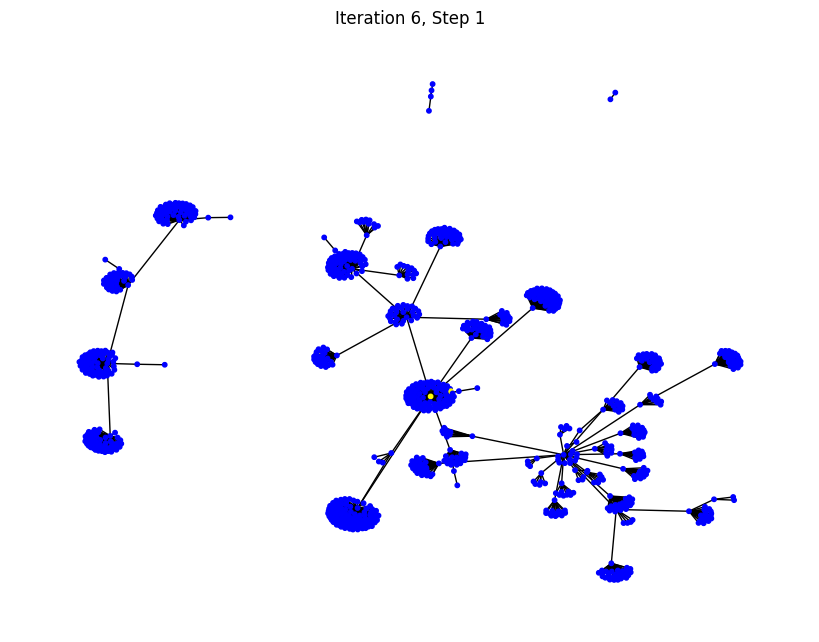

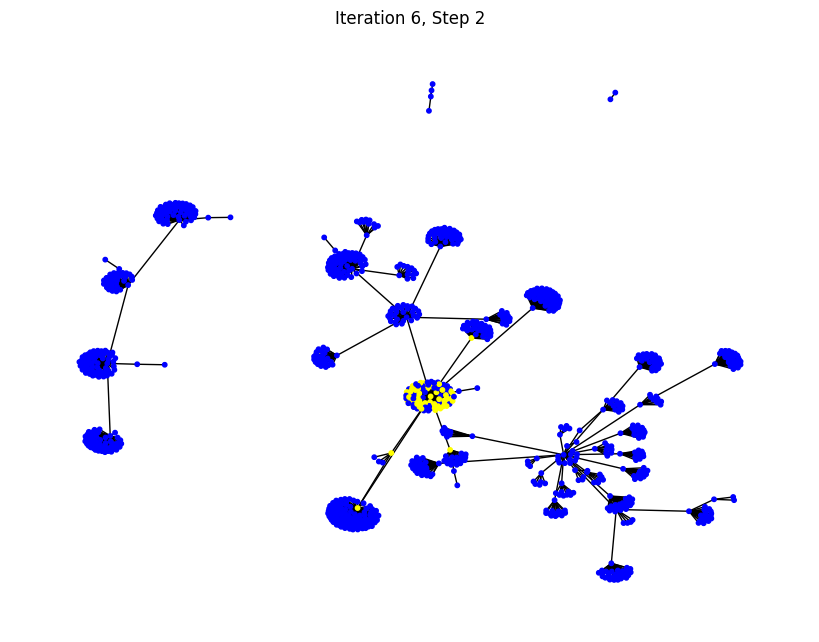

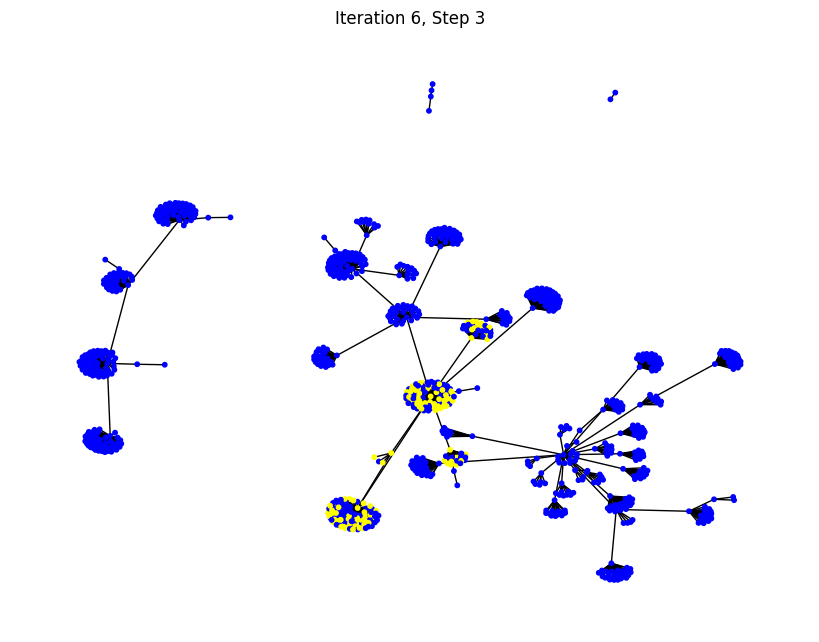

Test 6: Information was passed to 125 nodes in 3 steps.


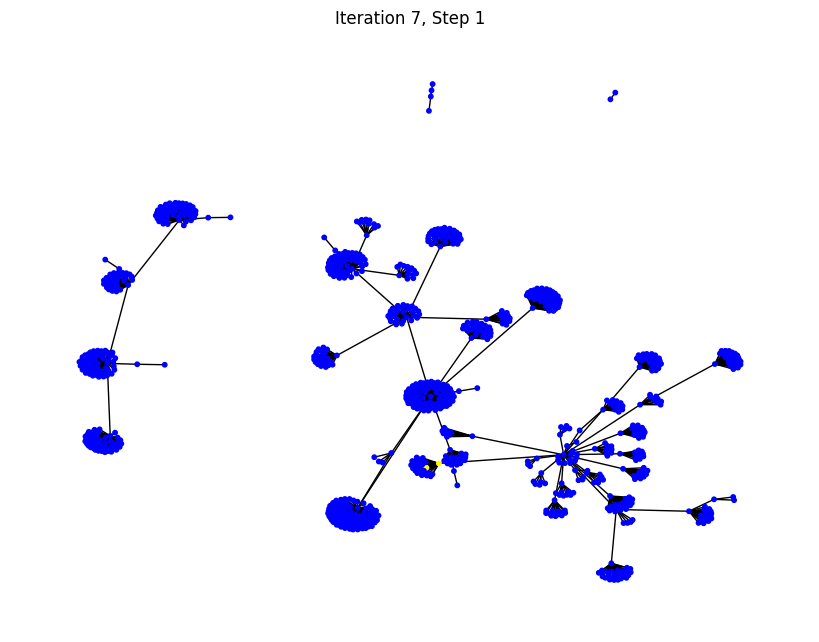

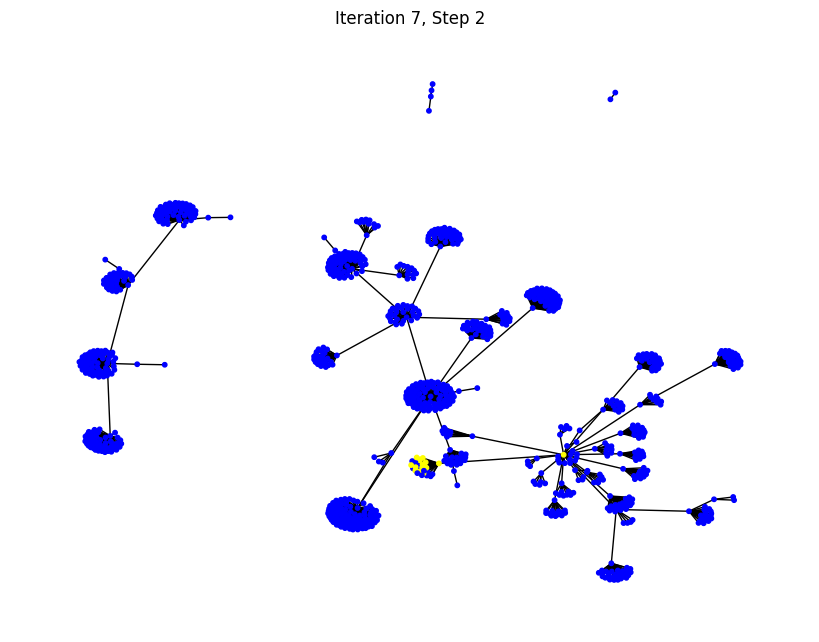

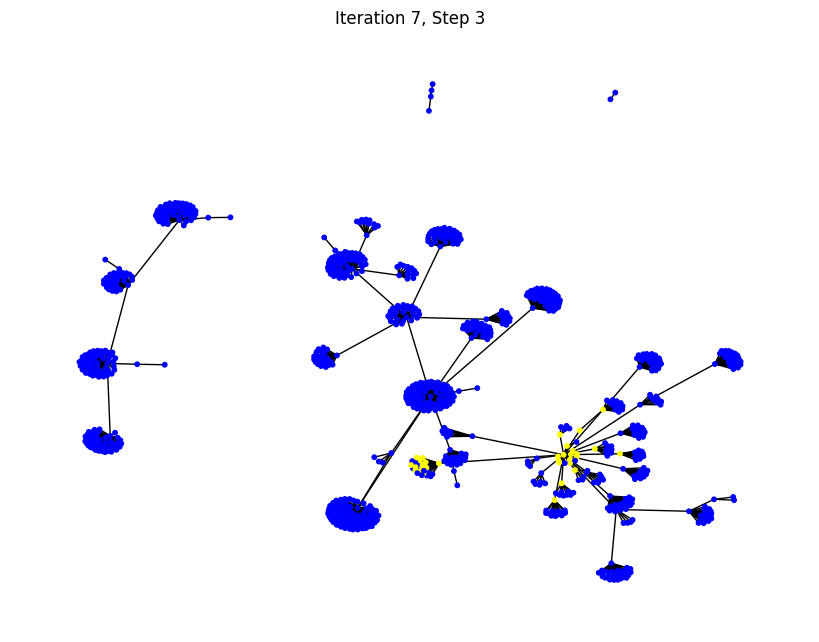

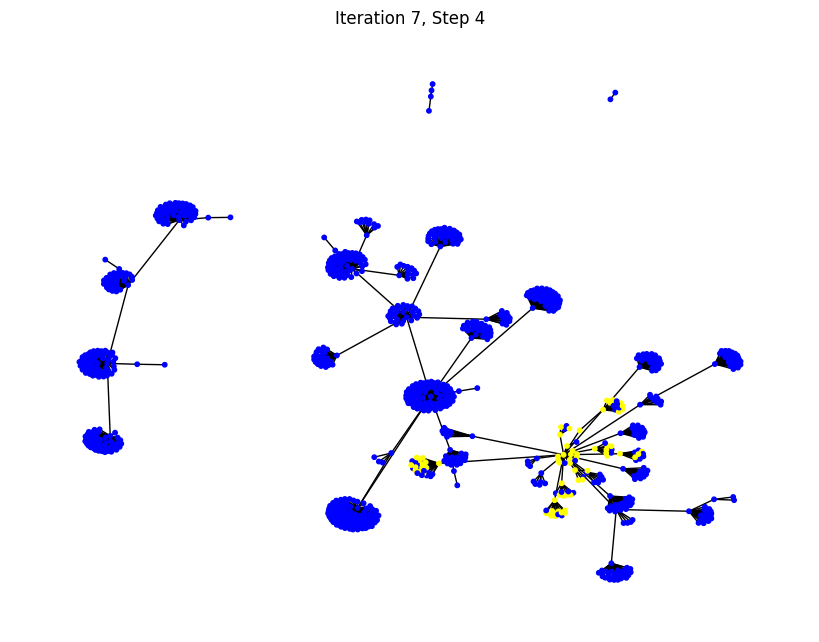

Test 7: Information was passed to 68 nodes in 4 steps.
Test 8: Information was passed to 1 nodes in 0 steps.
Test 9: Information was passed to 1 nodes in 0 steps.


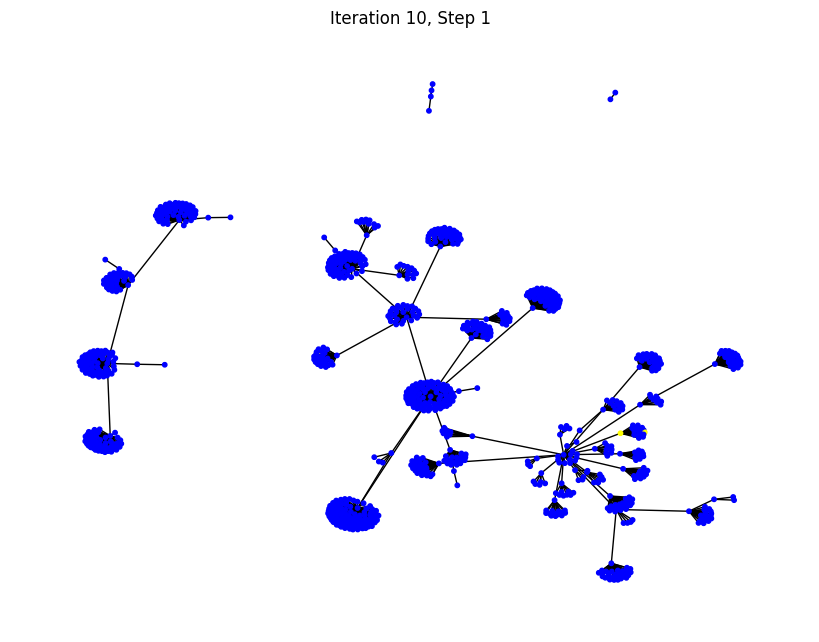

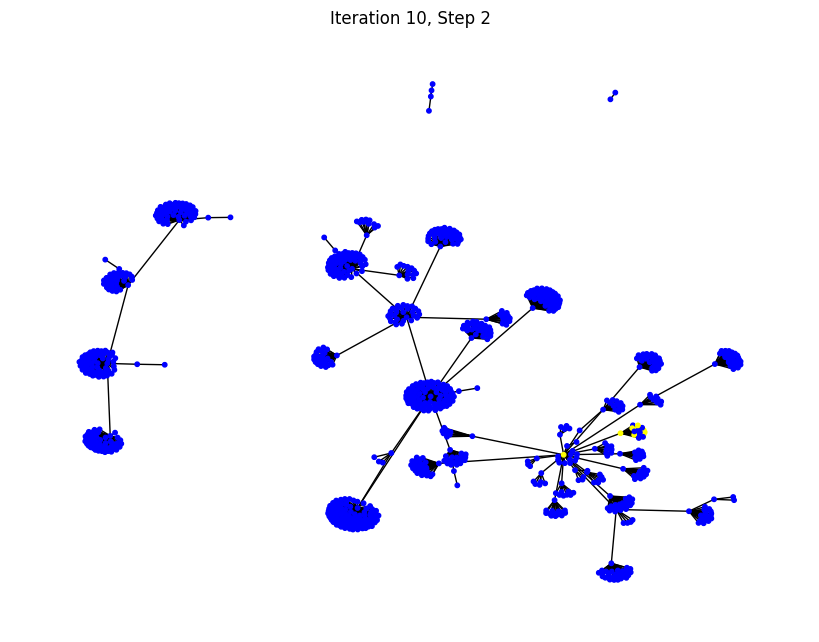

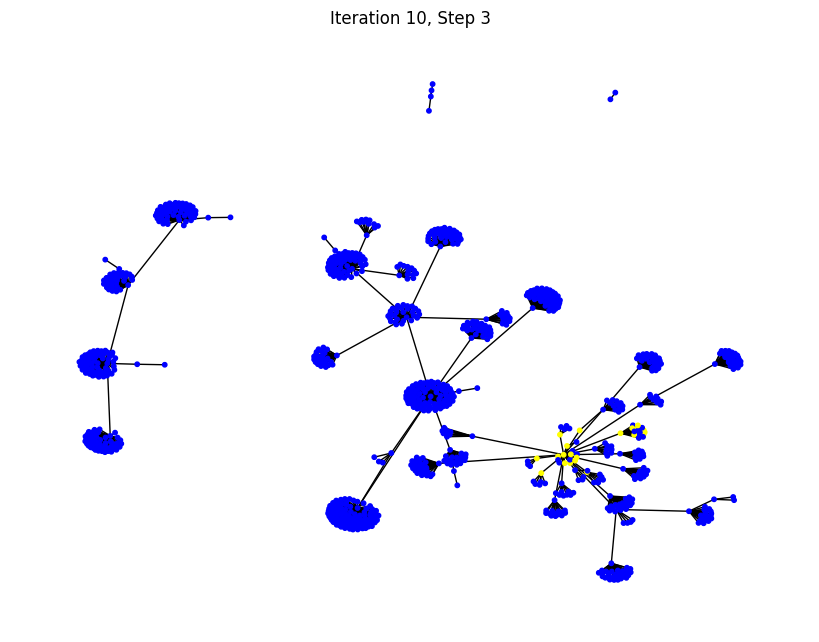

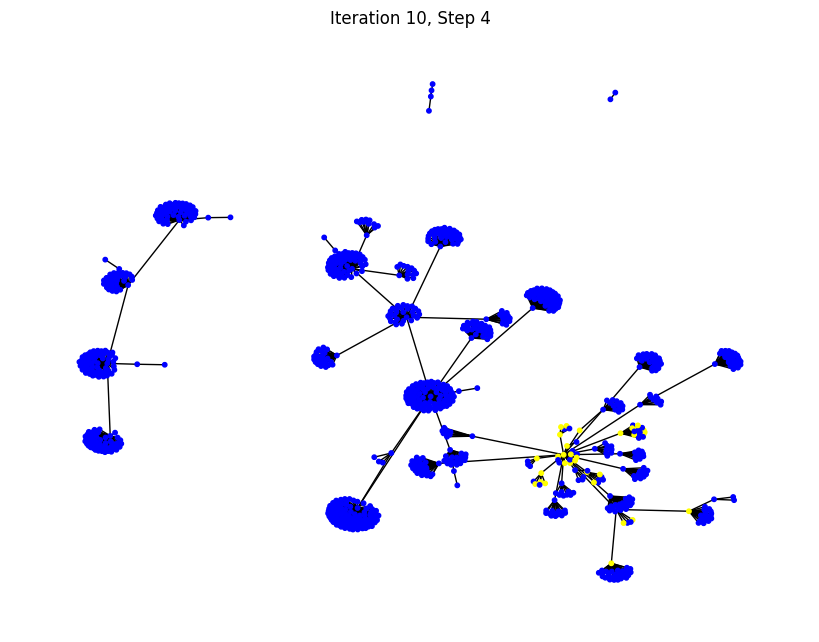

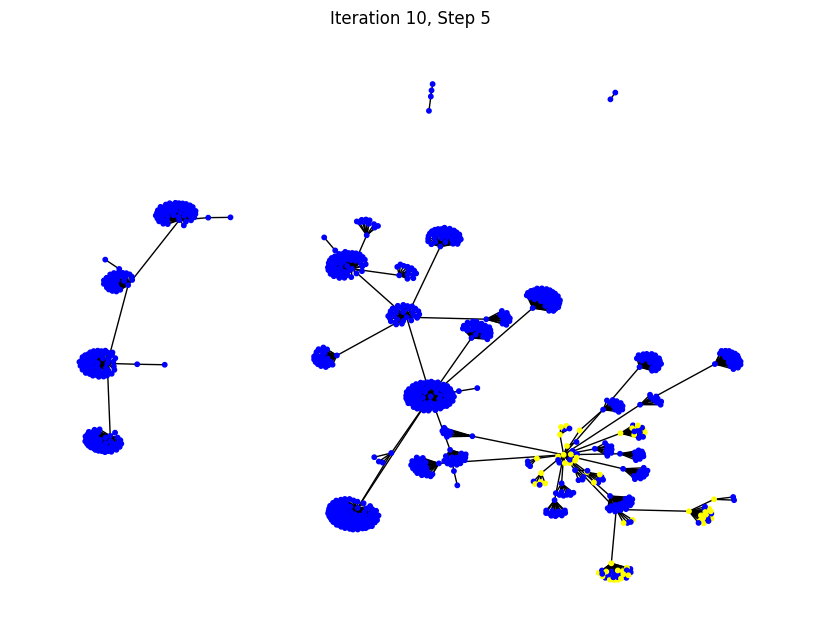

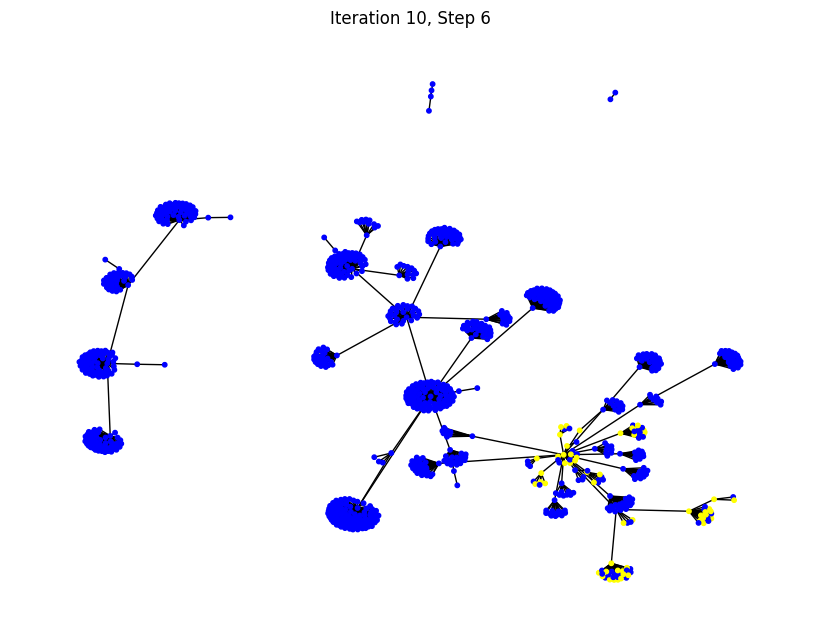

Test 10: Information was passed to 58 nodes in 6 steps.
Average number of nodes infected = 42.9
Average number of steps = 2.0


In [18]:
# Function to load dataset into a NetworkX graph
# Function to load dataset into a NetworkX graph
def load_dataset(filename):
    # Assuming the dataset is an edge list CSV file
    G = nx.read_edgelist(filename, delimiter=',', nodetype=str)
    return G

# Function to display graph
def display_graph(G):
    pos = nx.spring_layout(G)  # Define layout for better visualization
    nx.draw(G, pos, with_labels=True)
    plt.show()

# Main function
def main():
    filename = "newdata2.csv"  # Update with your dataset filename
    G = load_dataset(filename)
    spread_info(prob=0.50, G=G)

if __name__ == "__main__":
    main()

For probability = 0.3


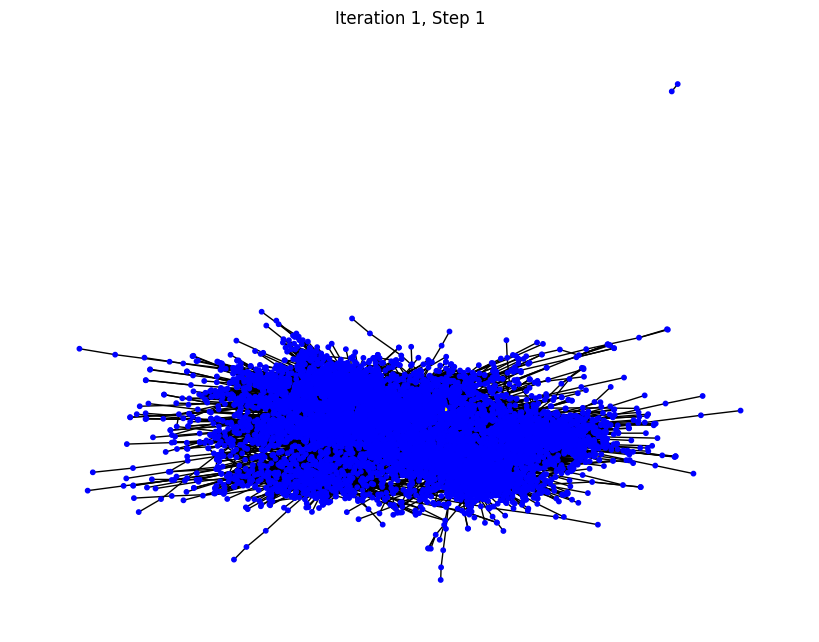

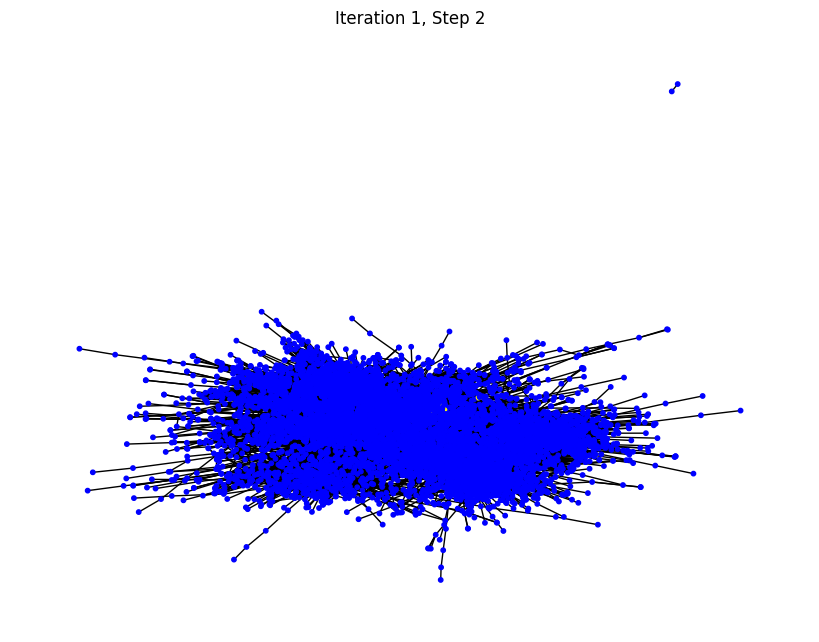

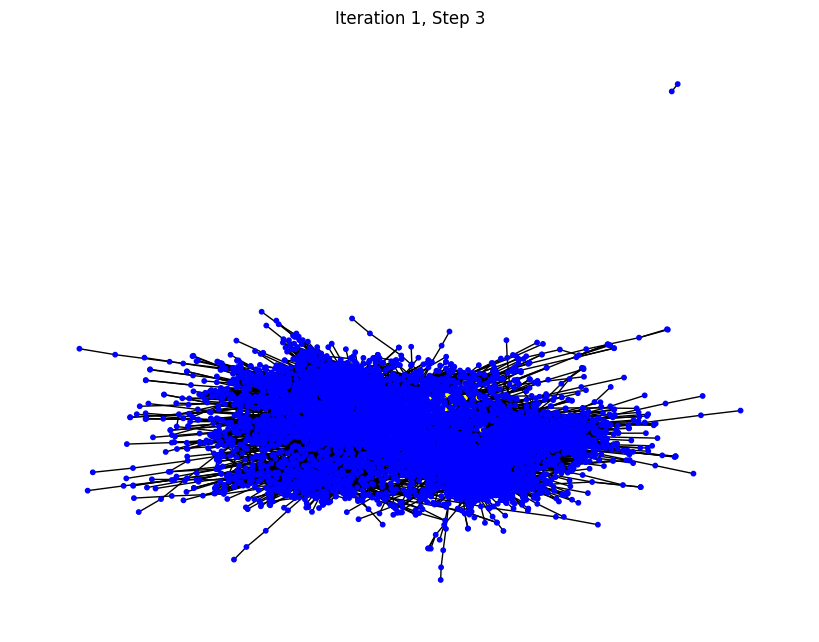

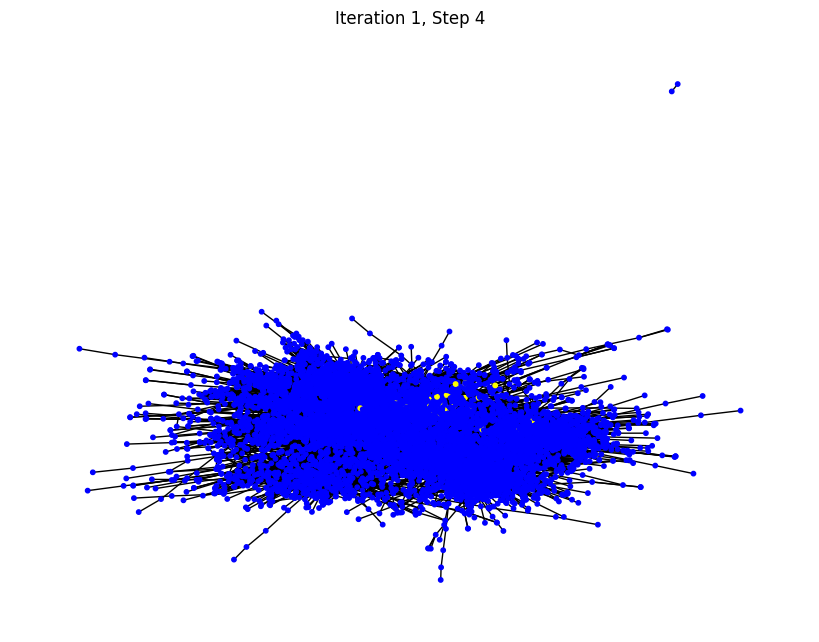

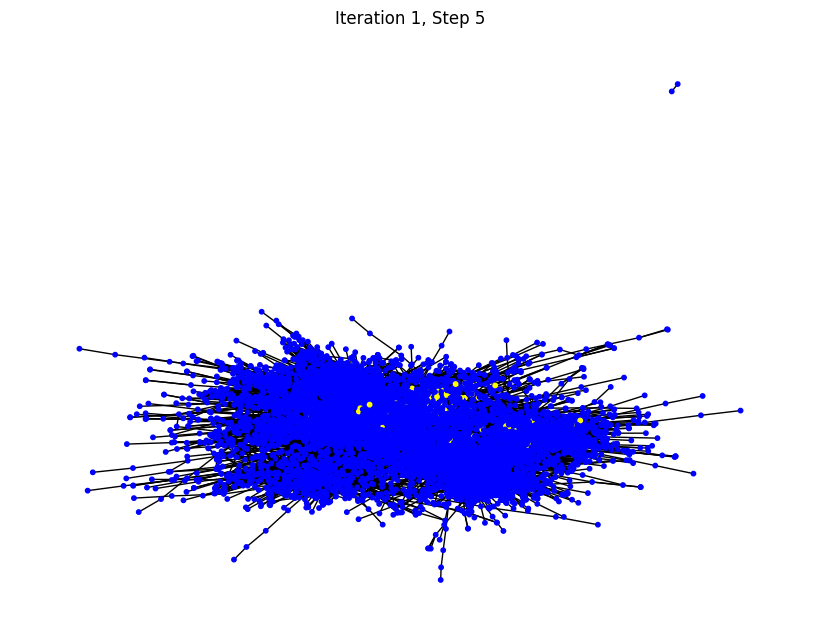

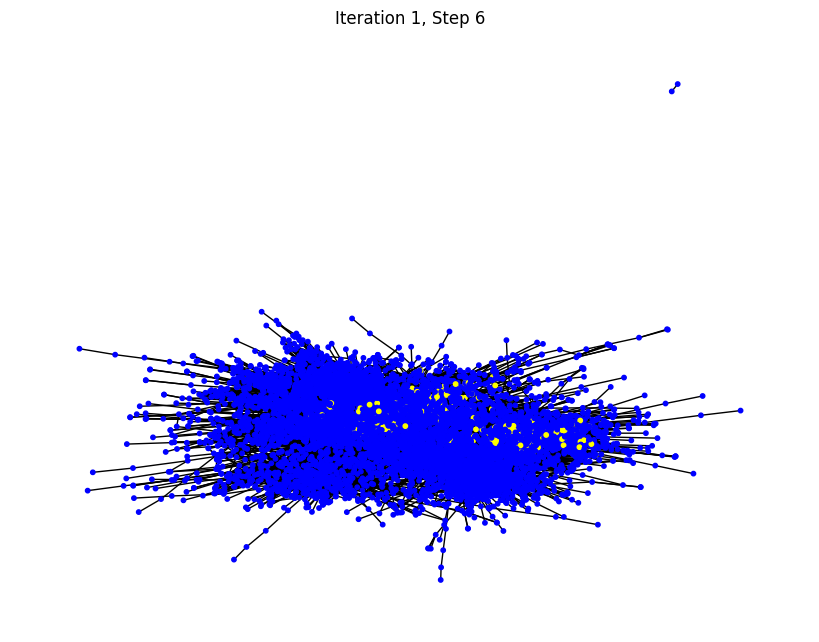

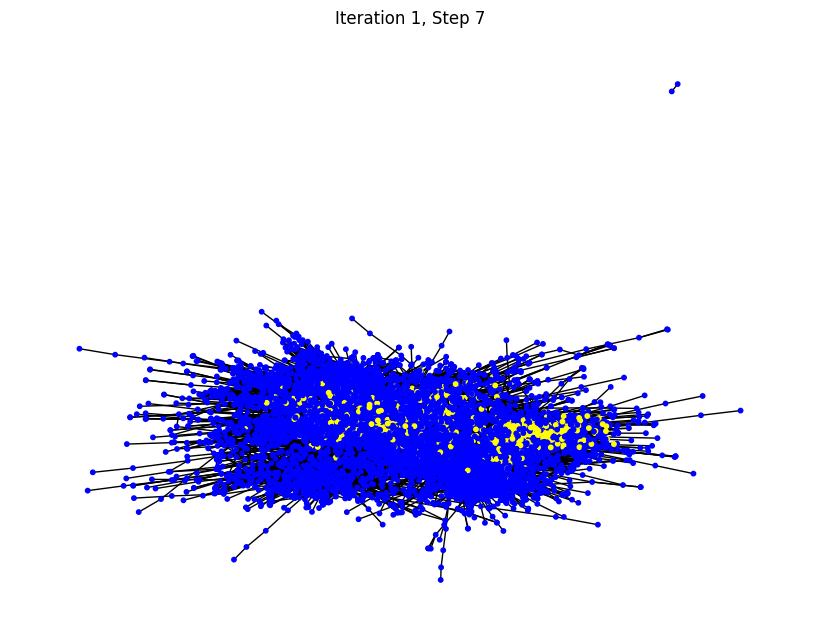

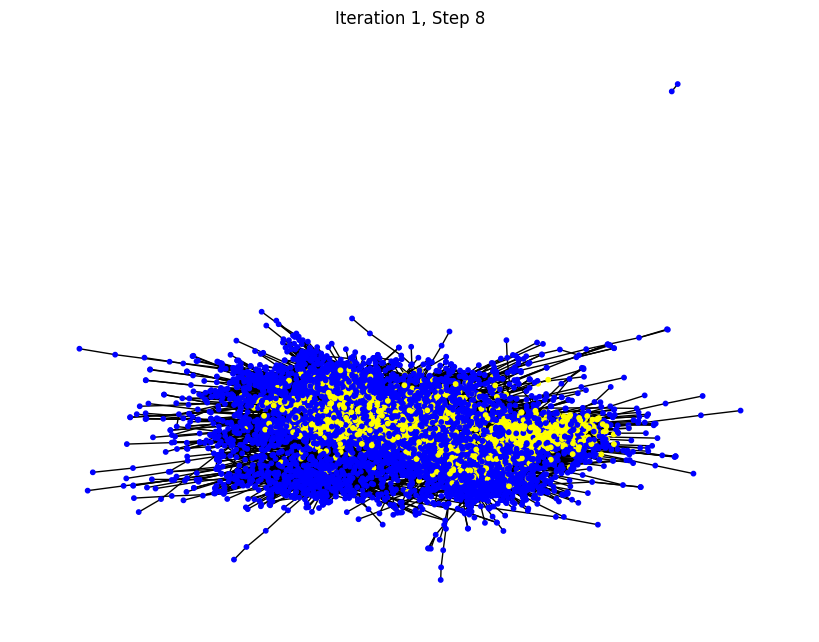

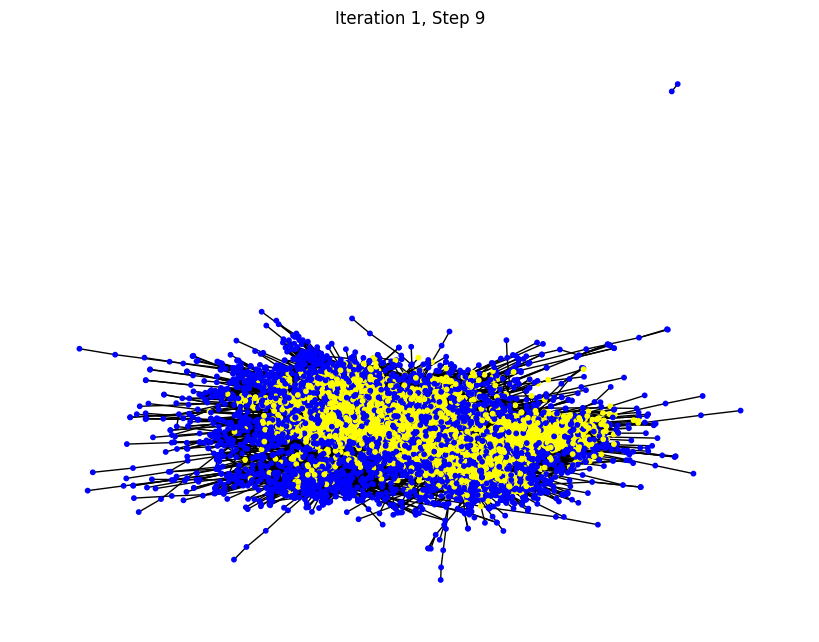

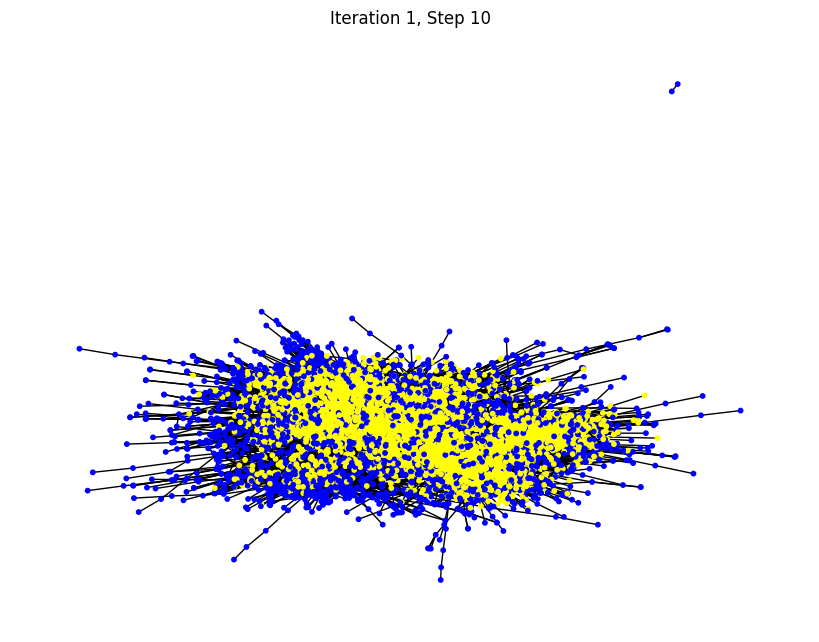

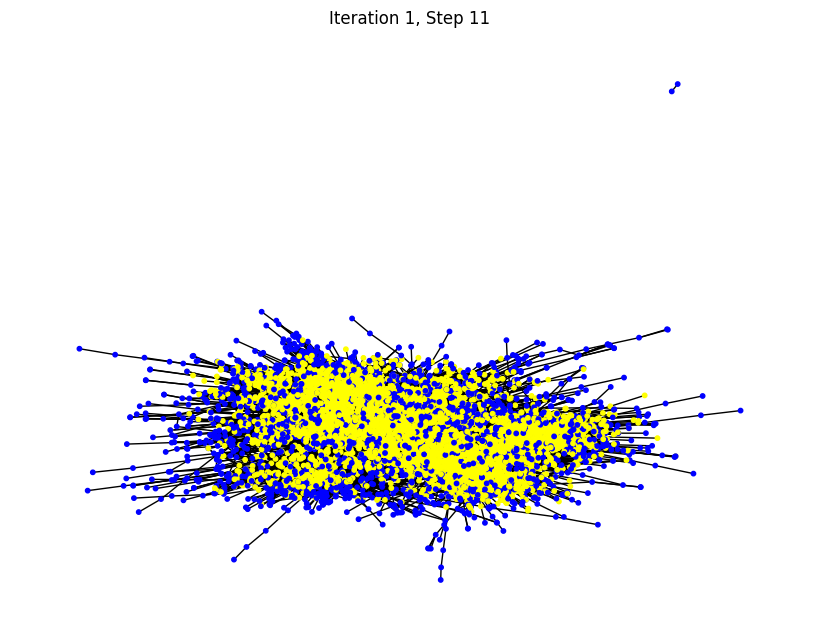

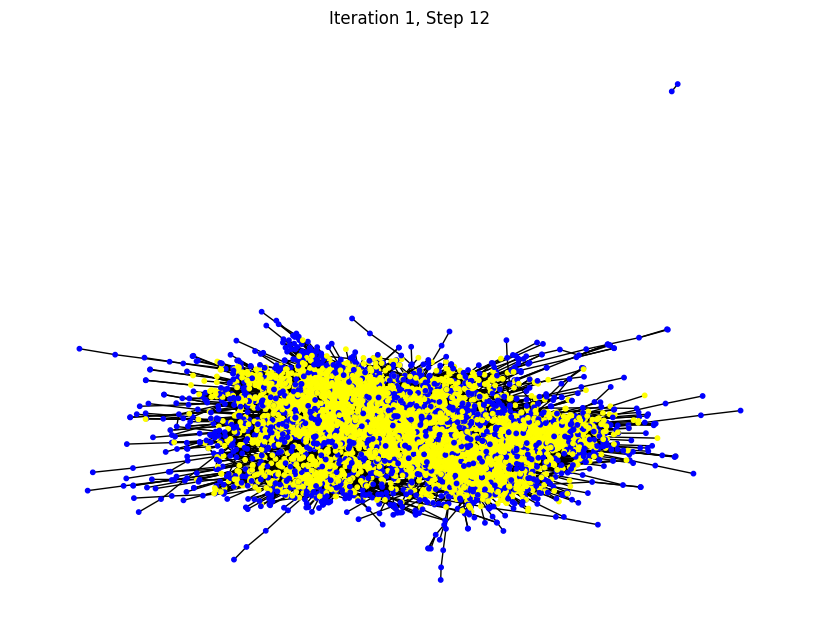

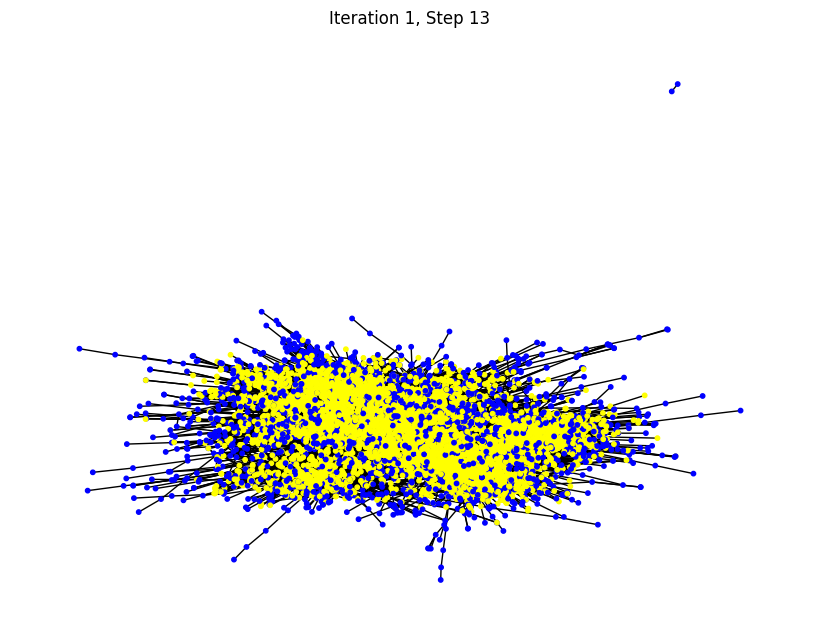

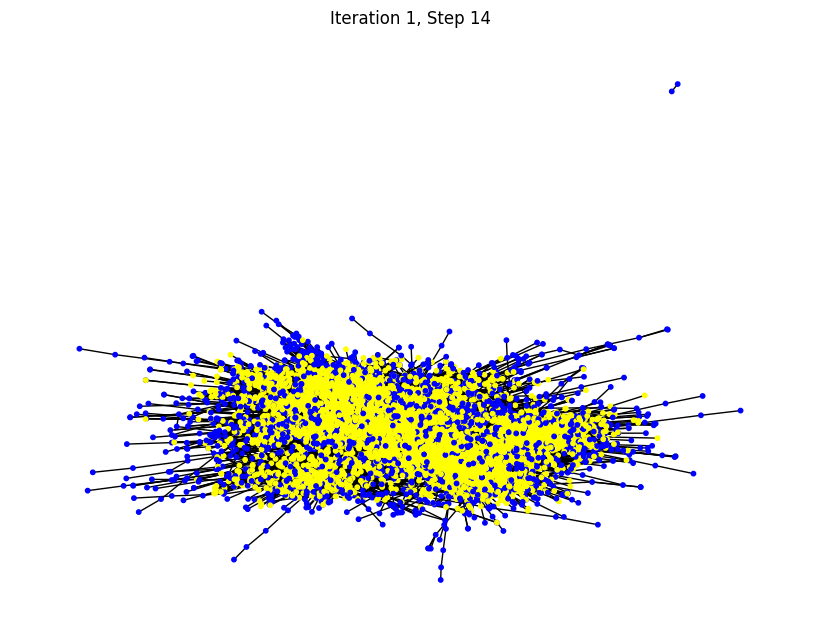

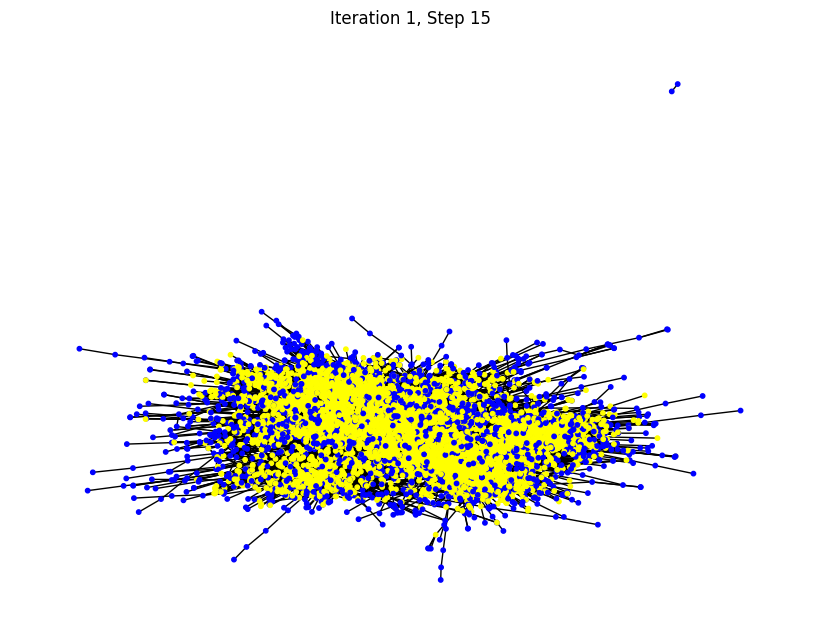

KeyboardInterrupt: 

<Figure size 800x600 with 0 Axes>

In [19]:
# Function to load dataset into a NetworkX graph
# Function to load dataset into a NetworkX graph
def load_dataset(filename):
    # Assuming the dataset is an edge list CSV file
    G = nx.read_edgelist(filename, delimiter=',', nodetype=str)
    return G

# Function to display graph
def display_graph(G):
    pos = nx.spring_layout(G)  # Define layout for better visualization
    nx.draw(G, pos, with_labels=True)
    plt.show()

# Main function
def main():
    filename = "lastfm_asia_edges.csv"  # Update with your dataset filename
    G = load_dataset(filename)
    spread_info(prob=0.30, G=G)

if __name__ == "__main__":
    main()